In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data = pd.read_csv('college_performance.csv')

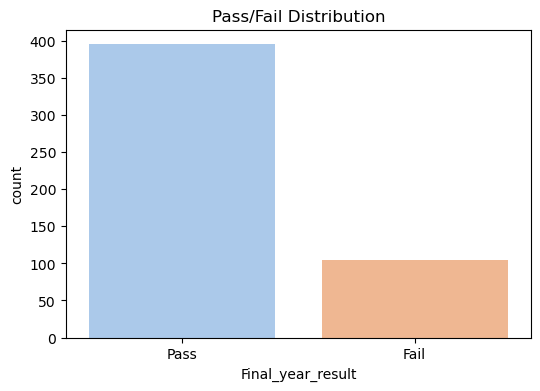

In [36]:
# 1. Target Variable Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Final_year_result', hue='Final_year_result', palette='pastel', legend=False)
plt.title('Pass/Fail Distribution')
plt.show()

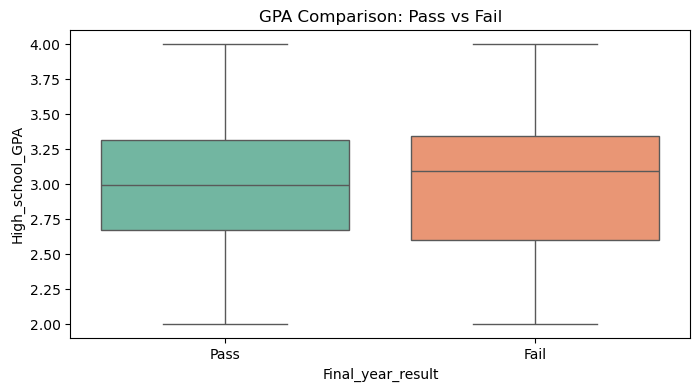

In [37]:
# 2. GPA vs Result
plt.figure(figsize=(8,4))
sns.boxplot(data=data, x='Final_year_result', y='High_school_GPA', hue='Final_year_result', palette='Set2', legend=False)
plt.title('GPA Comparison: Pass vs Fail')
plt.show()

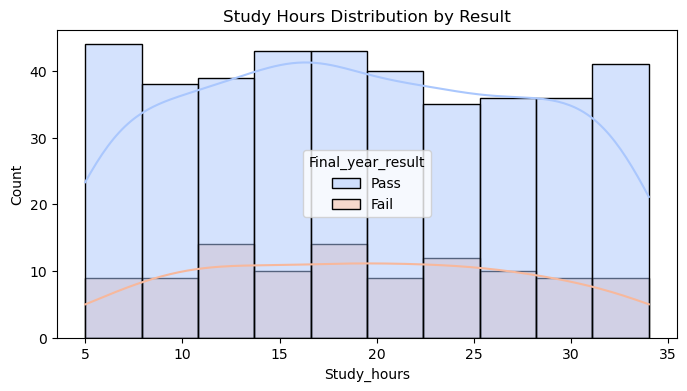

In [38]:
# 3. Study Hours Distribution
plt.figure(figsize=(8,4))
sns.histplot(data=data, x='Study_hours', hue='Final_year_result', kde=True, palette='coolwarm')
plt.title('Study Hours Distribution by Result')
plt.show()

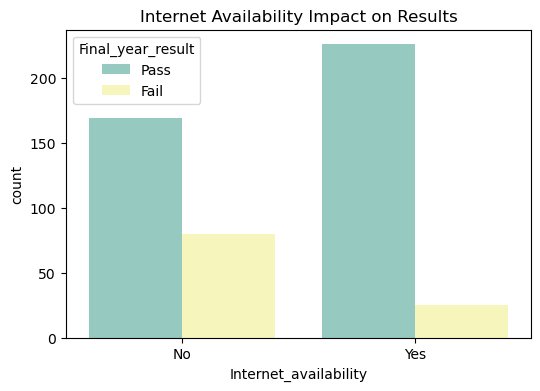

In [39]:
# 4. Internet Availability Impact
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Internet_availability', hue='Final_year_result', palette='Set3')
plt.title('Internet Availability Impact on Results')
plt.show()

In [40]:
data['Internet_availability'] = data['Internet_availability'].map({'Yes': 1, 'No': 0})
X = data.drop('Final_year_result', axis=1)
y = data['Final_year_result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'\nModel Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Model Accuracy: 0.71

Classification Report:
              precision    recall  f1-score   support

        Fail       0.30      0.29      0.29        21
        Pass       0.81      0.82      0.82        79

    accuracy                           0.71       100
   macro avg       0.56      0.55      0.56       100
weighted avg       0.70      0.71      0.71       100

